<a href="https://colab.research.google.com/github/3B032049/2025_ML_hws/blob/main/hw5-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 讀入深度學習套件

In [32]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

In [33]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [34]:
import urllib.request
import os
import tarfile

In [35]:
url="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath="data/aclImdb_v1.tar.gz"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('downloaded:',result)

In [36]:
if not os.path.exists("data/aclImdb"):
    tfile = tarfile.open("data/aclImdb_v1.tar.gz", 'r:gz')
    result=tfile.extractall('data/')

### 2. 讀入數據

一般自然語言處理, 我們會限制最大要使用的字數。

In [37]:
import re
def rm_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)


In [38]:
import os

def read_files(filetype):
    path = f"data/aclImdb/{filetype}/"
    file_list = []
    labels = []
    for sentiment in ["pos", "neg"]:
        folder = os.path.join(path, sentiment)
        for filename in os.listdir(folder):
            with open(os.path.join(folder, filename), "r", encoding="utf8") as f:
                file_list.append(rm_tags(f.read()))
                labels.append(1 if sentiment == "pos" else 0)
    return file_list, labels


In [39]:
train_text, y_train = read_files("train")
test_text, y_test = read_files("test")

# . 建立 tokenizer

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

num_words = 5000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_text)



In [41]:
x_train_seq = tokenizer.texts_to_sequences(train_text)
x_test_seq = tokenizer.texts_to_sequences(test_text)

x_train = pad_sequences(x_train_seq, maxlen=100)
x_test = pad_sequences(x_test_seq, maxlen=100)
y_train = np.array(y_train)
y_test = np.array(y_test)

### 4. step 01: 打造一個函數學習機

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32, input_length=100))  # (5000 x 32 = 160,000)
model.add(Flatten())  # output shape: (None, 3200)
model.add(Dense(64, activation='relu'))  # 3200 x 64 + 64 = 204,864
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 64 x 1 + 1 = 65

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#### 欣賞我們的 model

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 5. step 02: 訓練

In [44]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2  # 20% 驗證資料
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6462 - loss: 0.6144 - val_accuracy: 0.6994 - val_loss: 0.6441
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8949 - loss: 0.2664 - val_accuracy: 0.8358 - val_loss: 0.3805
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9544 - loss: 0.1465 - val_accuracy: 0.7724 - val_loss: 0.5862
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9913 - loss: 0.0511 - val_accuracy: 0.7790 - val_loss: 0.6917
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9979 - loss: 0.0187 - val_accuracy: 0.7450 - val_loss: 0.9373
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9996 - loss: 0.0078 - val_accuracy: 0.7678 - val_loss: 0.9257
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9998 - loss: 0.0044 - val_accuracy: 0.7406 - val_loss: 1.1396
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9995 - loss: 0.0035 - val_accu

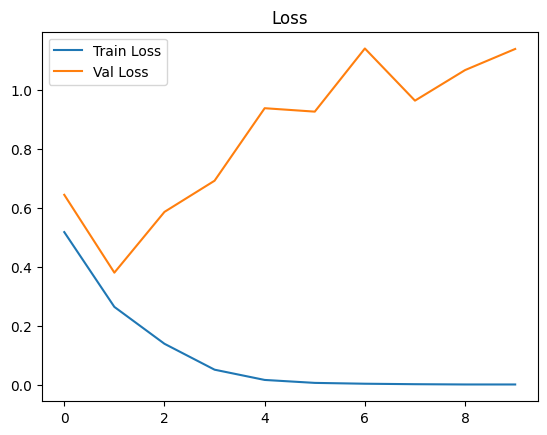

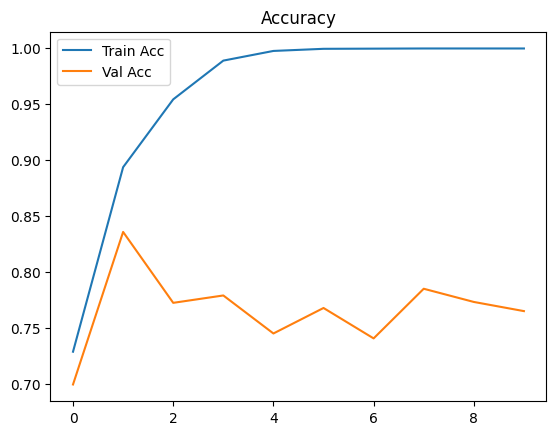

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()


In [46]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {acc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8811 - loss: 0.5148
Test accuracy: 0.8310


### 6. 換個存檔方式

這次是把 model 和訓練權重分開存, 使用上更有彈性。

In [47]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [49]:
model_json = model.to_json()
open('imdb_model_architecture.json', 'w').write(model_json)
model.save_weights('imdb_model.weights.h5')

In [50]:
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)